In [1]:
# Time code execution
import time


In [2]:
# Main code here - generate plots and animations in individual cells below.
# YOUR CODE HERE

"""
This program demonstrates the Curie temperature (Tc) and shows how
ferromagnetism develops spontaneously from the Ising model.
In part 1, the relationship between the temperature and the
average magnetic moment is demonstrated with a graph. In part 2,
the evolution of the electron grid is shown with an animation 
for 3 different temperatures.
"""

# Import the needed modules
import numpy as np
import matplotlib.pyplot as plt

# Define constants and given conditions
grid_size = 50  # The size of the electron grid
J = 1  # Constant
mu = 1  # Constant
n_iterations = 600_000  #  Number of iterations for convergence
n_measurement = 5  # The number of magnetic moment measurement
temp_arr = np.array([0.01, 0.1, 1, 2, 3, 4, 5, 10, 100])  # Temperature array
m_max_arr = np.array([])  # The maximum magnetic moment of the n_measurements

# Define functions

def create_electron_grid():
    """
    Creates a random grid that resembles electron spins of +1 and -1
    based on the grid_size variable defined above and returns it.

    Returns:
        The randomly created electron grid. 
    """

    # Fast way of creating a random -1, +1 array grid
    electron_grid = np.random.randint(
        0, 1 + 1, (grid_size, grid_size))  # Create the NxN grid
    electron_grid[electron_grid == 0] = -1  # Replace 0 with -1

    return electron_grid


def calc_energy(grid):
    """
    Calculates the energy lattice of the given electron grid and returns it.

    Keyword arguments:
        grid: Numpy array of NxN randomly generated -1, +1 values

    Returns:
        The calculated energy lattice of the electron grid.
    """

    sigma = 0
    # Loop over the 2D grid and calculate the energy of each position
    # and sum them all up.
    for (i, j), value in np.ndenumerate(grid):
        sigma += grid[i][j] * (grid[i - 1][j] + grid[(i + 1)
            % grid_size][j] + grid[i][j - 1] + grid[i][(j + 1)% grid_size])

    sigma *= (-1 / 2)
    return sigma


def calc_energy_diff(grid, row_idx, col_idx):
    """
    Calculates the energy of the given electron position in a grid and
    returns the value.
    """
    energy_diff = grid[row_idx][col_idx] * (grid[row_idx - 1][col_idx] +
        grid[(row_idx + 1) % grid_size][col_idx] + grid[row_idx][col_idx - 1]
            + grid[row_idx][(col_idx + 1)% grid_size])

    return energy_diff * 2


def flip_random_spin(grid):
    """
    Multiplies a random value of the 2 dimensional array by -1 to
    flip the electron's spin.

    Returns:
        The row and column index of the flipped value.
    """

    # Generate 2d random indices to flip electron's spin
    i, j = np.random.randint(0, grid_size, grid.ndim)

    # Change the random electron's spin by multiply by -1
    grid[i, j] *= -1

    # Return the indices of the changed flip in the grid
    return i, j


def should_accept_new_energy(old_energy, new_energy, temp):
    """
    Calculates the probability of accepting the new electron configuration
    by looking at the ratio of the probabilities of the old and new configuration
    energy.

    Keyword arguments:
        old_energy: The energy of the grid before random flip
        new_energy: The new energy of the grid after random flip
        temp: The temperature of the system

    Returns:
        True if the the new configuration was accepted based on the
        probability or False otherwise.
    """
    exponent = -1 * ((new_energy - old_energy) / temp)
    probability = np.exp(exponent)

    # Generate a random number between [0, 1)
    rand_num = np.random.uniform(0, 1)

    # Accept if the random values falls under or equal
    # to the probability.
    if (rand_num <= probability):
        return True

    return False


def calc_avg_magnetic_moment(grid):
    """
    Calculates the average magnetic moment of the system and return it.
    """
    return (1 / (grid_size**2)) * np.sum(grid)


def converge(grid, iterations, temp):
    """
    Loops over the number of iterations and randomly flips one of
    the electron spins in each iteration. It then accepts the new
    configuration if its less than or equal to the old energy of 
    the grid or passes the probability test. Otherwise reverts back
    to the old configuration. This function changes the `grid` variable
    in place.

    Keyword arguments:
        grid: The initial electron grid configuration.
        iterations: The number of iterations to loop over.
        temp: The temperature of the system for probability calculation.
    """

    # Calculate the initial energy
    curr_energy = calc_energy(grid)
    for i in range(iterations):

        # Flip a random electron spin
        row_idx, col_idx = flip_random_spin(grid)
        energy_diff = calc_energy_diff(grid, row_idx, col_idx)

        # Calculate the new energy
        new_energy = curr_energy - energy_diff

        # If the new energy is bigger accept it with a probability
        if (new_energy > curr_energy):
            should_accept = should_accept_new_energy(curr_energy, new_energy,
                                                     temp)

            if (should_accept == False):
                grid[row_idx, col_idx] *= -1
                continue

        # Set the old energy = new energy to prevent having to calculate
        # the energy of the new grid from scratch.
        curr_energy = new_energy


# Loop over each temperature and take n magnetic moment measurements
for temp in temp_arr:
    # Holds the num of measurements of average magnetic moment values
    m_arr = np.ones(n_measurement)

    # Calculate n independent measurements of average magnetic moment
    for j in range(n_measurement):
        # Create a random grid
        grid = create_electron_grid()

        # Loop until convergence
        converge(grid, n_iterations, temp)

        # Calculate the average magnetic moment and store it
        m = calc_avg_magnetic_moment(grid)
        m_arr[j] = np.abs(m)

    # Get the max M value
    m_max_arr = np.append(m_max_arr, np.max(m_arr))


# Find the Curie's temperature by the values that are
# closest to M of 0.5

def find_closest(arr, val):
    """
    Finds the closes index of a given values in an array
    and returns it.
    """
    idx = np.abs(arr - val).argmin()
    return idx

upper_bound_idx_Tc = find_closest(m_max_arr, 0.6)
lower_bound_idx_Tc = find_closest(m_max_arr, 0.4)

# Find the temperature based on the upper and lower
# bound indices. This will always work because the
# size of the temp_arr and m_max_arr should always
# be the same.
upper_temp = temp_arr[upper_bound_idx_Tc]
lower_temp = temp_arr[lower_bound_idx_Tc]

# Find the midpoint of the 2 bounds which is the Tc
Tc = (upper_temp + lower_temp) / 2
print(f"Curie's Temperature: {Tc:.3f} (degrees C or F)")

Curie's Temperature: 2.500 (degrees C or F)


Text(0.5, 1.0, 'Average Magnetic Moment and Temperature Relationship')

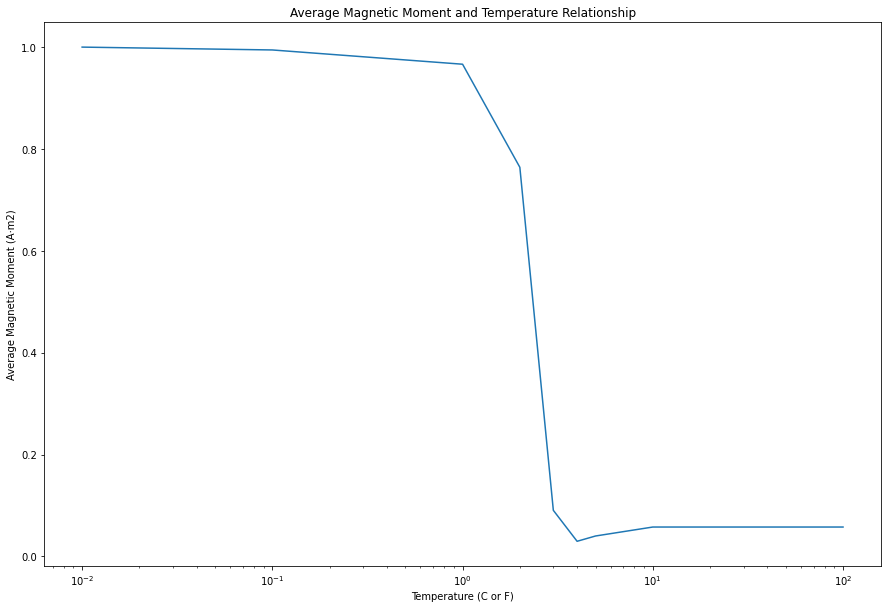

In [3]:
# Plot the M-max vs Temperature
# Create the plot figure

plt.figure(figsize=(15, 10))

# Plot the temperature vs magnetic moment max values
plt.plot(temp_arr, m_max_arr)

# Change the scale to log
plt.xscale("log") 

plt.xlabel("Temperature (C or F)"); plt.ylabel("Average Magnetic Moment (A⋅m2)")
plt.title("Average Magnetic Moment and Temperature Relationship")

MovieWriter ffmpeg unavailable; using Pillow instead.


TypeError: __init__() got an unexpected keyword argument 'extra_args'

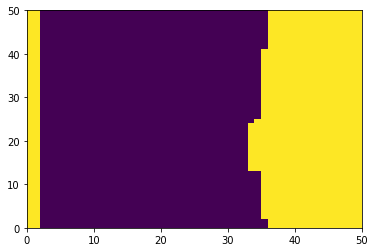

In [4]:
# Animation
# Generate Deliverable 2.1 here: Animation for T = 0.1
# YOUR CODE HERE
import matplotlib.animation as animation
from IPython.display import HTML

# Define variables and constants
T = 0.1 # Temperature of the system
fig = plt.figure()  # Create a new figure

def create_evolution_animation(steps, temp):
    """
    Creates an animation file for the evolution of the
    electron network over the total iterations.

    Keyword arguments:
        steps - The number of frames to capture
        temp - The temperature of the system
    """
    ims = []  # List to store our grids of random numbers

    # Create the initial electron_grid
    grid = create_electron_grid()

    # Calculate its initial energy
    curr_energy = calc_energy(grid)


    # Loop over the grids until it converges
    for i in range(n_iterations):
         # Flip a random electron spin
        row_idx, col_idx = flip_random_spin(grid)
        energy_diff = calc_energy_diff(grid, row_idx, col_idx)

        # Calculate the new energy
        new_energy = curr_energy - (2 * energy_diff)

        # If the new energy is bigger accept it with a probability
        if (new_energy > curr_energy):
            should_accept = should_accept_new_energy(curr_energy, new_energy,
                                                     temp)

            if (should_accept == False):
                grid[row_idx, col_idx] *= -1
                continue

        if(i % steps == 0):
            ims.append((plt.pcolormesh(grid), ))  # each image added as a tuple

    # Animate the 50 frames stored in ims
    imani = animation.ArtistAnimation(
        fig,  # Not used here, but would be needed for resizing, etc
        ims,  # The list to animate
        interval=60,  # Time between frames in ms
        repeat=False  # Repeat not used here. Useful in later projects
    )

    # Save to a file: which can be viewed from outside or within the notebook
    imani.save('random.webm', extra_args=['-vcodec', 'libvpx'])
    plt.close()  # Prevents a stray plot from appearing
    del ims  # Release crucial Cocal memory related to these objects
    del imani  #

create_evolution_animation(2000, T)

# Link the video into the notebook
# - You can add the word autoplay between video and controls to make the
#   video play automatically, i.e., <video controls autoplay>
# - You can add the word loop between video and controls to cause the
#   video to play over and over again.
# - The HTML line must be the last line of code in the cell.
HTML('<video controls> <source src="random.webm" type="video/webm"> </video>')


In [ ]:
# Define variables and constants
T = 2.5  # Temperature of the system
fig = plt.figure()  # Create a new figure
ims = []  # List to store our grids of random numbers

create_evolution_animation(2000, T)

# Link the video into the notebook
# - You can add the word autoplay between video and controls to make the
#   video play automatically, i.e., <video controls autoplay>
# - You can add the word loop between video and controls to cause the
#   video to play over and over again.
# - The HTML line must be the last line of code in the cell.
HTML('<video controls> <source src="random.webm" type="video/webm"> </video>')

In [ ]:
# Tests for pep8 returns warnings or errors. You may need to hit 'Save' after making changes for them to take effect.
nb_name = "Project3.ipynb"
cells_to_check = []
stop_at = ['cell-extension']
# check_style2.py uses cells_to_check and nb_name
%run -i check_style2.py

checking unnamed cell
checking unnamed cell
Style errors or warnings found:
6:60: W291 trailing whitespace
8:62: W291 trailing whitespace
20:25: E262 inline comment should start with '# '
34:44: W291 trailing whitespace
61:13: E128 continuation line under-indented for visual indent
61:63: E225 missing whitespace around operator
73:9: E128 continuation line under-indented for visual indent
74:42: E225 missing whitespace around operator
101:80: E501 line too long (81 > 79 characters)
138:65: W291 trailing whitespace
165:31: E712 comparison to False should be 'if cond is False:' or 'if not cond:'
checking unnamed cell
Style errors or warnings found:
10:18: W291 trailing whitespace
12:35: E702 multiple statements on one line (semicolon)
12:80: E501 line too long (80 > 79 characters)
checking unnamed cell
Style errors or warnings found:
8:8: E261 at least two spaces before inline comment
12:1: E302 expected 2 blank lines, found 1
24:80: E501 line too long (83 > 79 characters)
44:1: E305 exp

AssertionError: 